
## Machine Learning 

## Univariable Linear Regression

### Loading of Data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv("univariateData.dat", header=None)

In [4]:
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
data.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


### Ploting of Data

Text(0, 0.5, 'Ground Truth - Y ')

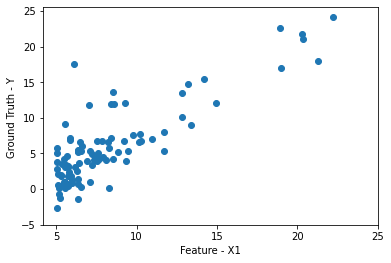

In [5]:
plt.scatter(data[0],data[1])
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel("Feature - X1")
plt.ylabel("Ground Truth - Y ")

### Compute the Cost Function $J(\Theta)$

$J(\Theta) = \frac{1}{2m} \sum_{i=1}^m (h_\Theta(x^{(i)}) - y^{(i)} )^2$


In [7]:
def computeCost(X,y,theta):
    """
    Take in a numpy array X,y, theta and generate the cost function of using theta as parameter
    in a linear regression model
    """
    m=len(y)
    predictions=X.dot(theta)
    square_err=(predictions - y)**2
    
    return 1/(2*m) * np.sum(square_err)

In [12]:

data_n=data.values
m=data_n[:,0].size
X=np.append(np.ones((m,1)),data_n[:,0].reshape(m,1),axis=1)
y=data_n[:,1].reshape(m,1)
theta=np.zeros((2,1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
computeCost(X_train,y_train,theta)

print(y_test)


[[17.929  ]
 [ 0.55657]
 [ 1.9869 ]
 [ 3.6518 ]
 [ 0.20421]
 [ 7.5435 ]
 [17.054  ]
 [ 5.3854 ]
 [ 3.2522 ]
 [17.592  ]
 [ 5.9966 ]
 [ 0.29678]
 [ 1.844  ]
 [13.501  ]
 [ 6.7318 ]
 [ 6.8233 ]
 [ 4.263  ]
 [ 3.1551 ]
 [ 2.8214 ]
 [ 3.3411 ]
 [ 1.0179 ]
 [ 6.6799 ]
 [ 1.0173 ]
 [ 3.5129 ]
 [ 5.4974 ]
 [ 1.8495 ]
 [ 3.8166 ]
 [ 0.47953]
 [15.505  ]
 [ 4.8852 ]]


### Gradient Descent

Minimize the cost function $J(\Theta)$ 

By updating Equation and repeat unitil convergence
        
$\Theta_j := \Theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\Theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\Theta_j$ for all $j$)

In [8]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    
    m=len(y)
    J_history=[]
    
    for i in range(num_iters):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(),(predictions -y))
        descent=alpha * 1/m * error
        theta-=descent
        J_history.append(computeCost(X,y,theta))
    
    return theta, J_history

In [9]:
def fit(X,y,theta,alpha,num_iters):
    """
    method to train the univariate and multivariate linear regression model
    """
    theta,J_history = gradientDescent(X,y,theta,0.01,1500)
    
    return theta, J_history
    

In [10]:
theta,J_history = fit(X_train,y_train,theta,0.01,1500)
print("h(x) ="+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"x1")

h(x) =-4.28 + 1.24x1


### Visualising the Cost Function $J(\Theta)$

In [11]:
from mpl_toolkits.mplot3d import Axes3D

In [12]:
#Generating values for theta0, theta1 and the resulting cost value
theta0_vals=np.linspace(-10,10,100)
theta1_vals=np.linspace(-1,4,100)
J_vals=np.zeros((len(theta0_vals),len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t=np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[i,j]=computeCost(X,y,t)

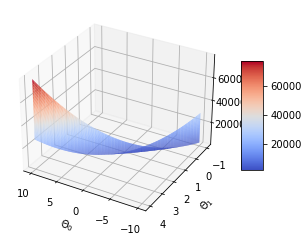

In [13]:
#Generating the surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(theta0_vals,theta1_vals,J_vals,cmap="coolwarm")
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")

#rotate for better angle
ax.view_init(30,120)


### Testing the implementation

Plot $J(\Theta)$ against the number of iteration 

Text(0.5, 1.0, 'Cost function using Gradient Descent')

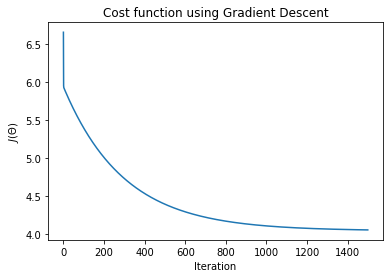

In [14]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

### Graph with Line of Best Fit

Text(0.5, 1.0, 'Prediction')

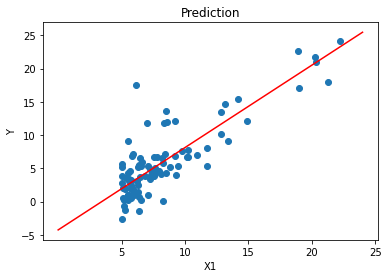

In [15]:
plt.scatter(data[0],data[1])
x_value=[x for x in range(25)]
y_value=[y*theta[1]+theta[0] for y in x_value]
plt.plot(x_value,y_value,color="r")
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel("X1")
plt.ylabel("Y")
plt.title("Prediction")


### Make predictions using the optimized $\Theta$ values

$h_\Theta(x) = \Theta^Tx$

In [16]:
def predict(x,theta):
    """
    Takes in numpy array of x and theta and return the predicted value of y based on theta
    """
    
#     predictions= np.dot(theta.transpose(),x)
    predictions= np.dot(x,theta)
    
#     return predictions[0]
    return predictions

In [17]:
predict1=predict(np.array([1,3.5]),theta)*10000
print("For X1 = 35,000, we predict "+str(round(predict1[0],0)))

For X1 = 35,000, we predict 625.0


In [18]:
predict2=predict(np.array([1,7]),theta)*10000
print("For X1 = 70,000, we predict "+str(round(predict2[0],0)))

For X1 = 70,000, we predict 44022.0


In [19]:
print(X_test.shape)
print(theta.shape)
y_predict = predict(X_test, theta)
# print(y_predict, y_train)



(30, 2)
(2, 1)


In [20]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
MAE = mean_absolute_error(y_test, y_predict)
# 
# The Mean Absolute Error (or MAE) is the average of the absolute differences
# between predictions and actual values. It gives an idea of how wrong the predictions were.

# The measure gives an idea of the magnitude of the error, but no idea of the direction 
# e.g. over or under predicting.
# 
print("MAE:   "  + str(MAE))
MSE = mean_squared_error(y_test, y_predict,squared=False)

# The Mean Squared Error (or MSE) is much like the mean absolute error in that it provides
# a gross idea of the magnitude of error.

# Taking the square root of the mean squared error converts the units back to the original
# units of the output variable and can be meaningful for description and presentation.

print("MSE:   "  + str(MSE))

MAE:   2.1296951986127683
MSE:   3.3108640922170314


In [21]:
true_predict = np.append(y_test,y_predict,axis=1)
print(true_predict)


[[17.929      22.10678457]
 [ 0.55657     2.42687932]
 [ 1.9869      2.3010289 ]
 [ 3.6518      3.69493075]
 [ 0.20421     2.15595995]
 [ 7.5435      7.83509945]
 [17.054      19.23020364]
 [ 5.3854     10.23964833]
 [ 3.2522      2.80356263]
 [17.592       3.29878092]
 [ 5.9966      3.89306766]
 [ 0.29678     3.84161158]
 [ 1.844       2.91602207]
 [13.501      11.62834257]
 [ 6.7318      5.42472301]
 [ 6.8233      2.98843255]
 [ 4.263       2.53003946]
 [ 3.1551      2.83245243]
 [ 2.8214      1.99601213]
 [ 3.3411      4.68226755]
 [ 1.0179      2.5938946 ]
 [ 6.6799      8.29051676]
 [ 1.0173      2.54157058]
 [ 3.5129      2.39278191]
 [ 5.4974      3.60044994]
 [ 1.8495      3.02810953]
 [ 3.8166      1.99006058]
 [ 0.47953     2.82650088]
 [15.505      13.28485641]
 [ 4.8852      4.67272028]]


## Multivariable Linear Regression

### Loading of Data

In [22]:
data2=pd.read_csv("multivariateData.dat", header=None)

In [23]:
data2.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [24]:
data2.describe()

,0,1,2
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


### Ploting of Data

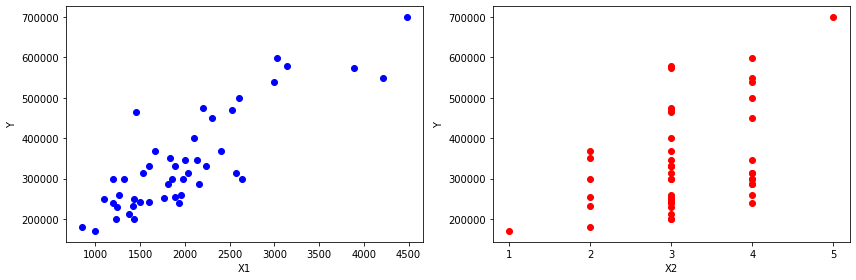

In [25]:
# Create 2 subplot, 1 for each variable
fig, axes = plt.subplots(figsize=(12,4),nrows=1,ncols=2)

axes[0].scatter(data2[0],data2[2],color="b")
axes[0].set_xlabel("X1")
axes[0].set_ylabel("Y")
axes[1].scatter(data2[1],data2[2],color="r")
axes[1].set_xlabel("X2")
axes[1].set_ylabel("Y")
axes[1].set_xticks(np.arange(1,6,step=1))

# Enhance layout
plt.tight_layout()


### Feature Normalization

To make sure features are on a similar scale:

$x_i = \frac{x_i - \mu_i}{\sigma_i}$

In [26]:

def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    X_norm = (X - mean)/std
    
    return X_norm , mean , std

In [27]:
data_n2=data2.values
m2=len(data_n2[:,-1])
X2=data_n2[:,0:2].reshape(m2,2)
X2, mean_X2, std_X2 = featureNormalization(X2)
X2 = np.append(np.ones((m2,1)),X2,axis=1)
y2=data_n2[:,-1].reshape(m2,1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state=42)
theta2=np.zeros((3,1))
print(X2_train.shape)
print(X2.shape)



(32, 3)
(47, 3)



### Compute Cost $J(\Theta)$

In the multivariate case, the cost function can also be written in the following vectorized form:

$J(\Theta) = \frac{1}{2m} (X\Theta - \overrightarrow{y})^T (X\Theta - \overrightarrow{y})$

In [28]:
computeCost(X2,y2,theta2)

65591548106.45744

### Gradient Descent

In [29]:

theta2, J_history2 = fit(X2_train,y2_train,theta2,0.1,400)
print("h(x) ="+str(round(theta2[0,0],2))+" + "+str(round(theta2[1,0],2))+"x1 + "+str(round(theta2[2,0],2))+"x2")

h(x) =322940.34 + 102798.54x1 + -1886.08x2


### Visualising the Cost Function $J(\Theta)$

Text(0.5, 1.0, 'Cost function using Gradient Descent')

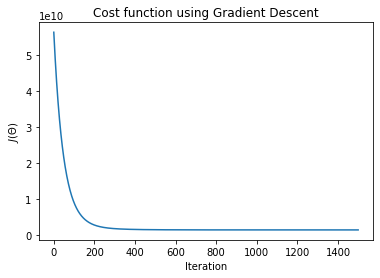

In [30]:
plt.plot(J_history2)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

### Make predictions using the optimized $\Theta$ values

In [31]:
#feature normalisation of x values
x_sample = featureNormalization(np.array([1700,2]))[0]
x_sample=np.append(np.ones(1),x_sample)
predict3=predict(x_sample,theta2)
print("For X1 = 1700, X2 = 2, we predict "+str(round(predict3[0],0)))

For X1 = 1700, X2 = 2, we predict 427625.0


In [32]:
print(X2_test.shape)
print(theta2.shape)
y2_predict = predict(X2_test, theta2)



(15, 3)
(3, 1)


In [33]:

MAE = mean_absolute_error(y2_test, y2_predict)
print("MAE:   "  + str(MAE))
MSE = mean_squared_error(y2_test, y2_predict,squared=False)
print("MSE:   "  + str(MSE))

MAE:   68395.5027280606
MSE:   87312.91776549026


In [34]:
true_predict2 = np.append(y2_test,y2_predict,axis=1)
print(true_predict2)

[[469000.         392053.95023029]
 [287000.         341954.49279809]
 [464500.         252409.48321431]
 [299000.         218675.14567674]
 [573900.         570401.3781421 ]
 [229900.         223774.52228125]
 [329999.         308894.8856028 ]
 [599000.         455579.06380641]
 [539900.         451525.71317206]
 [249900.         205599.82104977]
 [212000.         242210.73000527]
 [232000.         249423.12266104]
 [314900.         262346.7299308 ]
 [368500.         281849.92773591]
 [579900.         471944.18370105]]


## BONUS:  Lasso Regression

In [35]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X2_train, y2_train)
predictions = clf.predict(X2_test)
predC= predictions.reshape(len(y2_test),1)

In [36]:
LassoTrue_predict2 = np.append(y2_test,predC,axis=1)
print(LassoTrue_predict2)

[[469000.         392338.63853364]
 [287000.         341785.26611734]
 [464500.         252300.15675788]
 [299000.         218470.63587947]
 [573900.         571189.28379781]
 [229900.         223584.40066342]
 [329999.         308944.93590313]
 [599000.         455730.43527758]
 [539900.         451665.64788521]
 [249900.         205358.41848474]
 [212000.         242072.62718999]
 [232000.         249617.92655156]
 [314900.         262265.44197788]
 [368500.         282136.2256905 ]
 [579900.         472454.28681547]]


## Lasso Regression Performance Evaluation

In [37]:
MAE = mean_absolute_error(y2_test, predC)
print("MAE:   "  + str(MAE))
MSE = mean_squared_error(y2_test, predC,squared=False)
print("MSE:   "  + str(MSE))

MAE:   68295.75414614358
MSE:   87241.62055773393


## Linear Regression Performance Evaluation

In [38]:
MAE = mean_absolute_error(y2_test, y2_predict)
print("MAE:   "  + str(MAE))
MSE = mean_squared_error(y2_test, y2_predict,squared=False)
print("MSE:   "  + str(MSE))

MAE:   68395.5027280606
MSE:   87312.91776549026


Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters)

Using Lasso regression reduced the MSE and MAE, but this reduction was not significant.
